### import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
from skfeature.function.information_theoretical_based.MRMR import mrmr
from skfeature.function.information_theoretical_based.MIM import mim
from skfeature.function.information_theoretical_based.DISR import disr

from skfeature.function.similarity_based.fisher_score import fisher_score, feature_ranking
from skfeature.function.similarity_based.reliefF import reliefF

from art.attacks.evasion import FastGradientMethod, DeepFool
from art.estimators.classification import SklearnClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from art.utils import to_categorical
from sklearn.manifold import TSNE
import xlwt
from xlwt import Workbook
import xlsxwriter

import random
from tqdm import tqdm


plt.style.use('bmh')

In [2]:
# get the names of the datasets
# data_sets = [file[:-4] for file in os.listdir('data/')]

data_sets = ['breast-cancer-wisc-diag',
             'breast-cancer-wisc-prog',
             'conn-bench-sonar-mines-rocks',
             'cylinder-bands',
             'ionosphere',
             'molec-biol-promoter',
             'musk-1',
             'oocytes_merluccius_nucleus_4d',
             'oocytes_trisopterus_nucleus_2f',
             'parkinsons',
             'spectf_train'
            ]


## t-sne plots 

breast-cancer-wisc-diag
  > Benign: 455
  > Adversarial: 91
breast-cancer-wisc-prog
  > Benign: 158
  > Adversarial: 31
conn-bench-sonar-mines-rocks
  > Benign: 166
  > Adversarial: 33
cylinder-bands
  > Benign: 409
  > Adversarial: 81
ionosphere
  > Benign: 280
  > Adversarial: 56
molec-biol-promoter
  > Benign: 84
  > Adversarial: 16
musk-1
  > Benign: 380
  > Adversarial: 76
oocytes_merluccius_nucleus_4d
  > Benign: 817
  > Adversarial: 163
oocytes_trisopterus_nucleus_2f
  > Benign: 729
  > Adversarial: 145
parkinsons
  > Benign: 156
  > Adversarial: 31
spectf_train
  > Benign: 64
  > Adversarial: 12


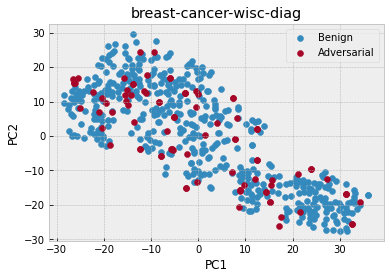

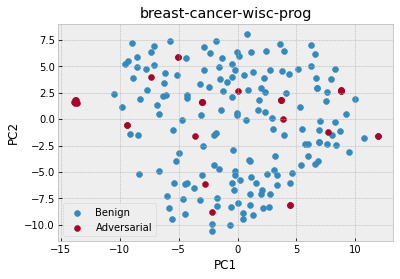

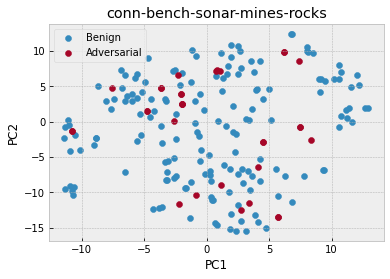

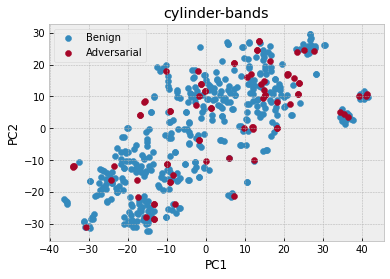

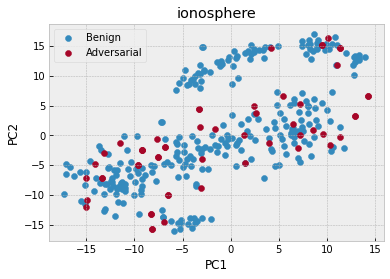

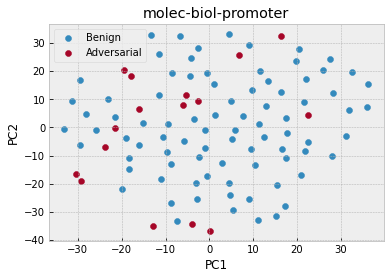

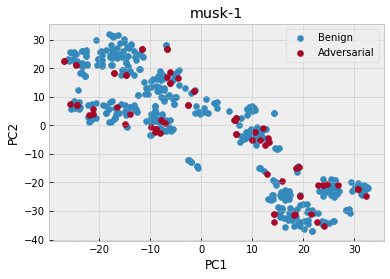

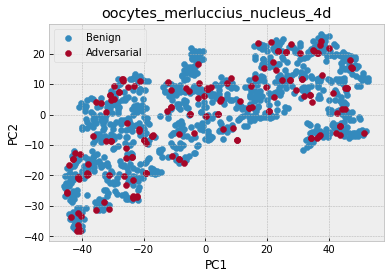

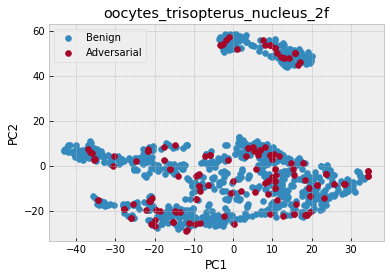

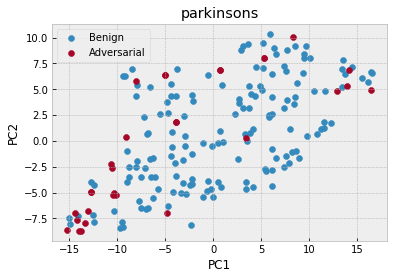

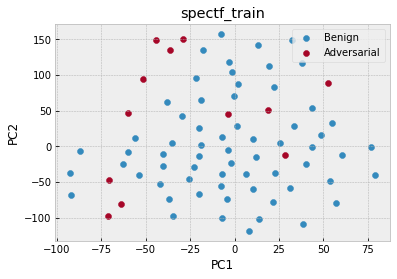

In [20]:
# generate TSNE plots of the normal and adversarial data that were generated with FGSM -- MLP
attack_type = 'jsma'      # jsma, fgsm, deepgool, cleanlabel_single, cleanlabel_pattern, embedding
for i in range(len(data_sets)): 

    np.random.seed(1)
    D = np.load('outputs/Classifier_NN/jsma/adversarial_data_' + data_sets[i] + '_' + attack_type + '.npz')
    Xtr, ytr, Xadv, yadv = D['Xtr'], D['ytr'], D['Xadv'], D['yadv']
    
    print(data_sets[i])
    print('  > Benign: ' + str(len(ytr)))
    print('  > Adversarial: ' + str(len(yadv)))

    X = np.concatenate((Xtr, Xadv))
    y = np.zeros((len(X)))
    y[len(ytr):] = 1
    Xe = TSNE(n_components=2).fit_transform(X)

    plt.figure()
    plt.scatter(Xe[y==0, 0], Xe[y==0, 1], label='Benign')
    plt.scatter(Xe[y==1, 0], Xe[y==1, 1], label='Adversarial')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(data_sets[i])
    plt.legend()
    plt.savefig('outputs/Classifier_NN/jsma/tsne_plots/' + data_sets[i] + '.pdf')


## bargraphs 

In [17]:
# get the names of the datasets
# data_sets = [file[:-4] for file in os.listdir('data/')]

data_sets = ['breast-cancer-wisc-diag',
             'breast-cancer-wisc-prog',
             'conn-bench-sonar-mines-rocks',
             'cylinder-bands',
             'ionosphere',
             'molec-biol-promoter',
#              'musk-1',
#              'oocytes_merluccius_nucleus_4d',
#              'oocytes_trisopterus_nucleus_2f',
#              'parkinsons',
#              'spectf_train'
            ]


MIM: top 10 features from normal data [22 23 20 27  7  2  6  0  3 13] for  breast-cancer-wisc-diag : 
MIM: top 10 features from adversarial data [22 23 20 27  7  2  6  3  0 26] for  breast-cancer-wisc-diag : 
MRMR: top 10 features from normal data [ 0  2  5  4  3  6  7  8  9 10] for  breast-cancer-wisc-diag : 
MRMR: top 10 features from adversarial data [ 0  2  5  4  3  6  7  8  9 10] for  breast-cancer-wisc-diag : 
DISR: top 10 features from normal data [29 28 27 26 25 24 23 22 21 20] for  breast-cancer-wisc-diag : 
DISR: top 10 features from adversarial data [29 28 27 26 25 24 23 22 21 20] for  breast-cancer-wisc-diag : 
Relief: top 10 features from normal data [20 22 23  0  2  3 27 21  7 26] for  breast-cancer-wisc-diag : 
Relief: top 10 features from adversarial data [25  2  0 11 18  3 16  4 14  8] for  breast-cancer-wisc-diag : 
Fisher: top 10 features from normal data [27 22 20  7  2  0 23  3  6 26] for  breast-cancer-wisc-diag : 
Fisher: top 10 features from adversarial data [25

<ipython-input-18-88e0229b6b87>:160: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


MIM: top 10 features from normal data [16 15 14 38 19 17  5  6  9 10] for  molec-biol-promoter : 
MIM: top 10 features from adversarial data [15 14 38 17 16  6 52 10 56 19] for  molec-biol-promoter : 
MRMR: top 10 features from normal data [0 1 2 3 4 5 6 7 8 9] for  molec-biol-promoter : 
MRMR: top 10 features from adversarial data [0 1 2 3 4 5 6 7 8 9] for  molec-biol-promoter : 
DISR: top 10 features from normal data [54 53 56 51 52 55 50 49 48 47] for  molec-biol-promoter : 
DISR: top 10 features from adversarial data [56 54 55 53 52 51 50 49 48 47] for  molec-biol-promoter : 
Relief: top 10 features from normal data [15 14 16 37 38 40  5 49 30 53] for  molec-biol-promoter : 
Relief: top 10 features from adversarial data [15 14 37 16 53 33 41 49 43 50] for  molec-biol-promoter : 
Fisher: top 10 features from normal data [14 15  5 40  6 12 30 39  9 13] for  molec-biol-promoter : 
Fisher: top 10 features from adversarial data [47 42 51 21  6 33 39 52 13 43] for  molec-biol-promoter : 

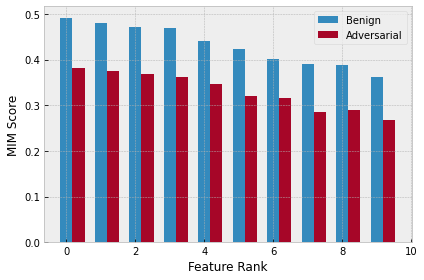

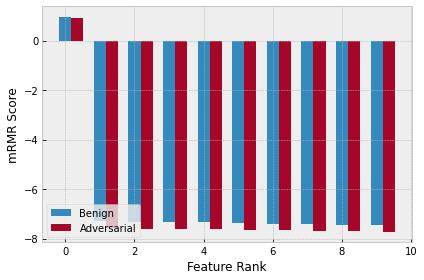

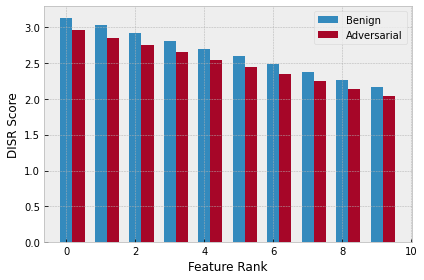

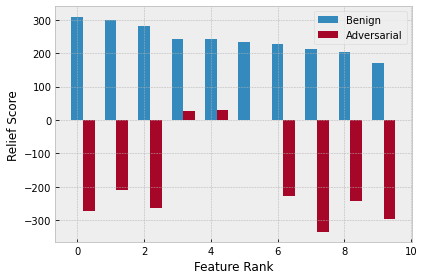

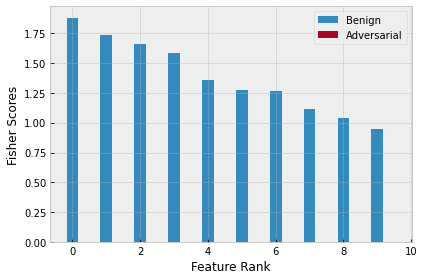

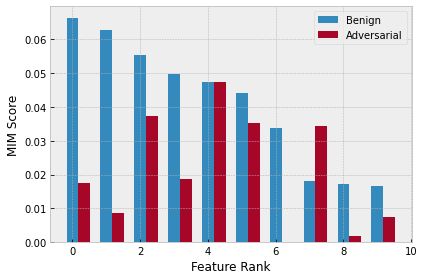

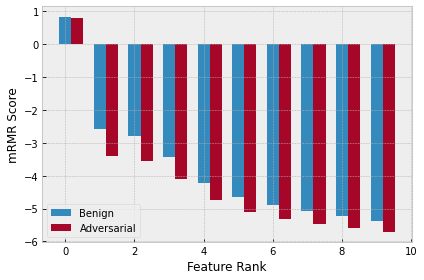

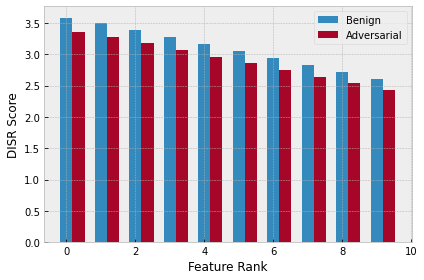

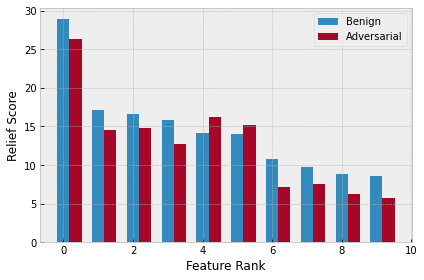

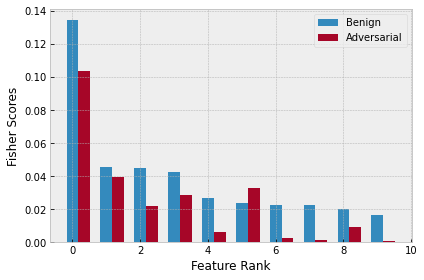

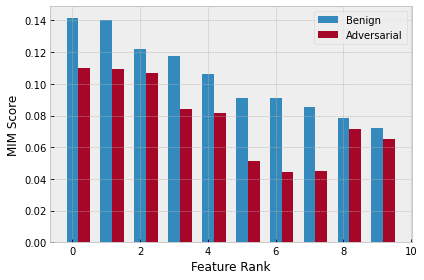

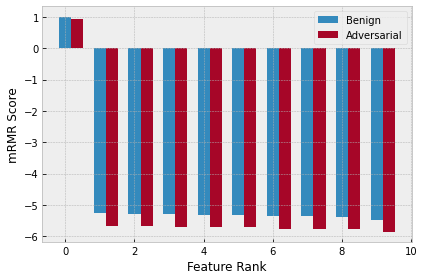

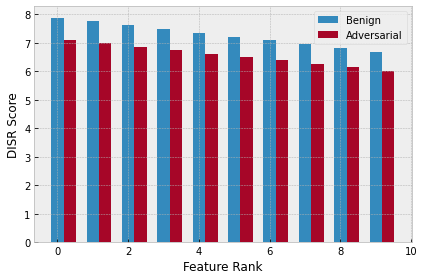

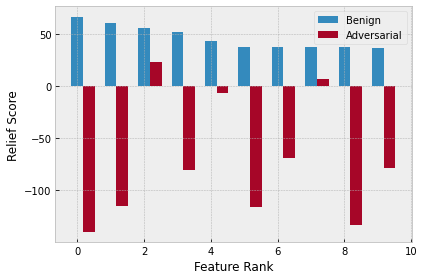

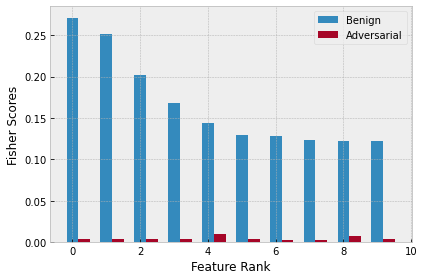

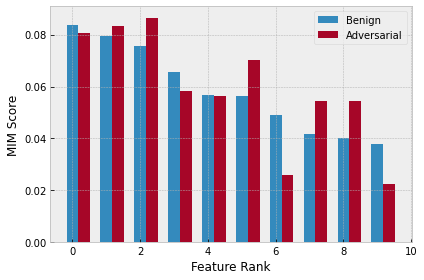

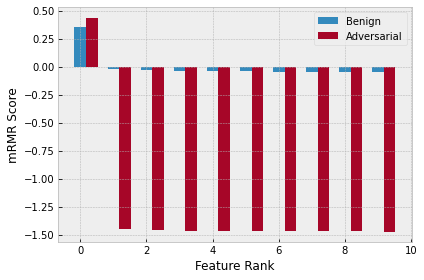

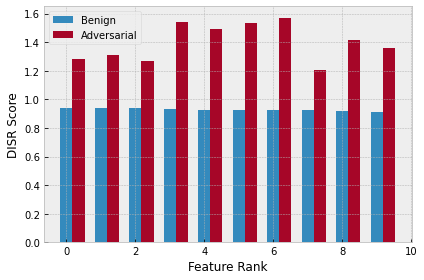

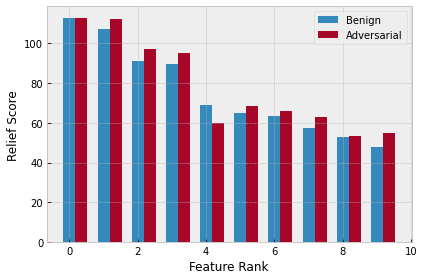

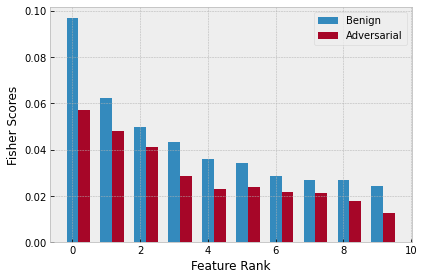

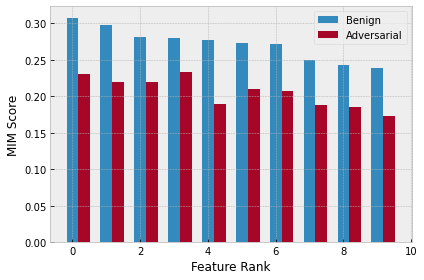

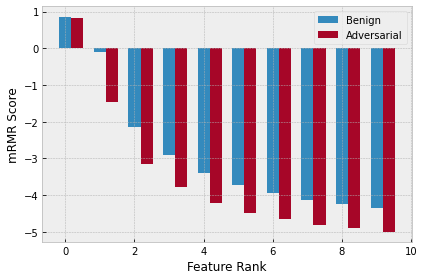

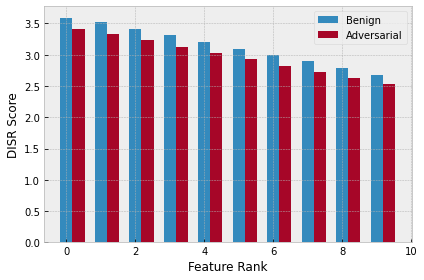

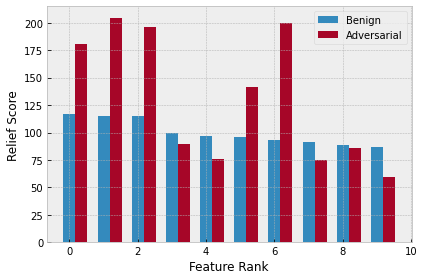

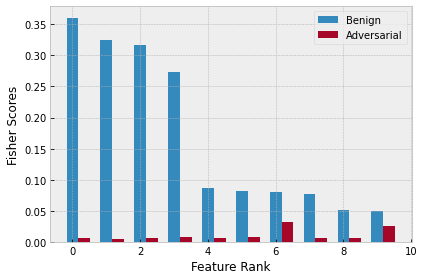

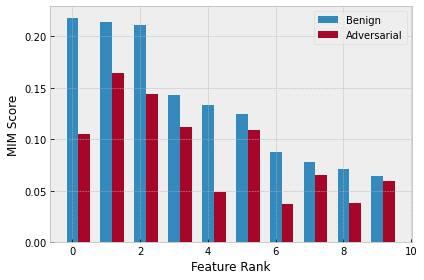

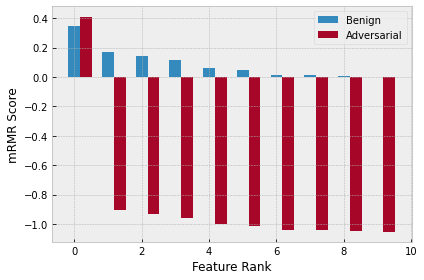

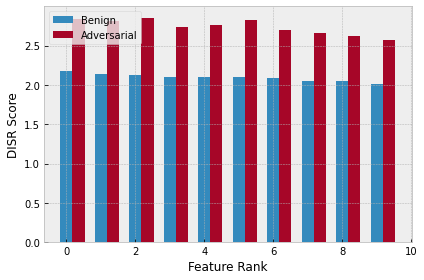

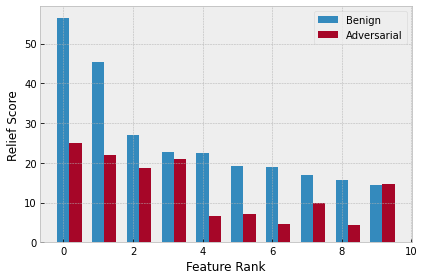

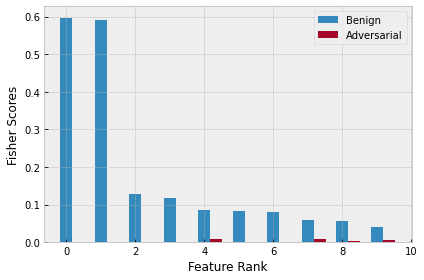

In [18]:
# ORIGINAL
# To load adversarial data (having both benign and malicous samples), Xtr_pois, ytr_pois is used for CleanLabel 
# and Embedding attacks, else it is Xadv, yadv

classifier = ['Classifier_LR'] #, 'Classifier_MLP', 'Classifier_NN', 'Classifier_SVC']
attack = 'deepfool' # deepfool, #fgsm, jsma, CleanLabel/Single, CleanLabel/Pattern, Embedding
post = 'deepfool'   # #deepfool, fgsm, jsma, cleanlabel_single, cleanlabel_pattern
RUNS = 5
SEED = 1
NBEST = 10
np.random.seed(SEED)

for i in range(len(classifier)):
    for j in range(len(data_sets)): 
        d = np.load('outputs/' + classifier[i] + '/' + attack + '/' + 'adversarial_data_' + data_sets[j] + '_' + post + '.npz')
        Xtr, ytr, Xtr_pois, ytr_pois = d['Xtr'], d['ytr'], d['Xadv'], d['yadv']
        
        mim_scores_norm, mim_scores_adv = np.zeros((Xtr.shape[1],)), np.zeros((Xtr.shape[1],))
        mrmr_scores_norm, mrmr_scores_adv = np.zeros((Xtr.shape[1],)), np.zeros((Xtr.shape[1],))
        disr_scores_norm, disr_scores_adv = np.zeros((Xtr.shape[1],)), np.zeros((Xtr.shape[1],))
        relief_scores_norm, relief_scores_adv = np.zeros((Xtr.shape[1],)), np.zeros((Xtr.shape[1],))
        fisher_scores_norm, fisher_scores_adv = np.zeros((Xtr.shape[1],)), np.zeros((Xtr.shape[1],))
        
        for k in range(RUNS):            
            
            if ((attack == 'deepfool') or (attack == 'fgsm') or (attack == 'jsma')):
                Xa, ya = np.concatenate((Xtr, Xtr_pois)), np.concatenate((ytr, ytr_pois))
            else:
                Xa, ya = Xtr_pois, ytr_pois
            
            i_perm = np.random.permutation(len(Xtr))
            Xtr, ytr = Xtr[i_perm], ytr[i_perm]
            
            j_perm = np.random.permutation(len(Xa))
            Xa, ya = Xa[j_perm], ya[j_perm]
            
#             temp1 = list(zip(Xtr, ytr))
#             random.shuffle(temp1)
#             Xtr, ytr = zip(*temp1)
            
#             temp2 = list(zip(Xtr_pois, ytr_pois))
#             random.shuffle(temp2)
#             Xtr_pois, ytr_pois = zip(*temp2)
            
            # MIM - 
            # Normal
            mi_score = mutual_info_classif(Xtr, ytr)
            mim_scores_norm += mi_score
            # Adversarial 
            mi_score = mutual_info_classif(Xa, ya)
            mim_scores_adv += mi_score
        
            # mRMR - 
            # Normal 
            _, mi_score, _ = mrmr(Xtr, ytr, n_selected_features=Xtr.shape[1])
            mrmr_scores_norm += mi_score
            # Adversarial 
            _, mi_score, _ = mrmr(Xa, ya, n_selected_features=Xtr.shape[1])
            mrmr_scores_adv += mi_score

            # DISR - 
            # Normal 
            _, mi_score, _ = disr(Xtr, ytr, n_selected_features=Xtr.shape[1])
            disr_scores_norm += mi_score
            # Adversarial 
            _, mi_score, _ = disr(Xa, ya, n_selected_features=Xtr.shape[1])
            disr_scores_adv += mi_score
            
            # Relief - 
            # Normal
            r_scores = reliefF(Xtr, ytr)
            relief_scores_norm += r_scores
            # Adversarial
            r_scores = reliefF(Xa, ya)
            relief_scores_adv += r_scores
            
            # Fisher - 
            # Normal
            f_scores = fisher_score(Xtr, ytr)
            #print("Clean Fisher Score: ", f_scores, "for RUN: ", k+1)
            fisher_scores_norm += f_scores
            # Adversarial
            f_scores = fisher_score(Xa, ya)
            #print("Adv Fisher Score: ", f_scores, "for RUN: ", k+1)
            fisher_scores_adv += f_scores
            


    
        # clean up MIM scores 
        mim_scores_norm /= RUNS
        mim_scores_adv /= RUNS
        i_sorted = np.argsort(mim_scores_norm)[::-1]
        adv_sorted = np.argsort(mim_scores_adv)[::-1]
        
        i_sorted = i_sorted[:NBEST]
        adv_sorted = adv_sorted[:NBEST]
        print("MIM: top 10 features from normal data", i_sorted, "for ", data_sets[j], ": ")
        print("MIM: top 10 features from adversarial data", adv_sorted, "for ", data_sets[j], ": ")
        mim_scores_adv = mim_scores_adv[i_sorted]
        mim_scores_norm = mim_scores_norm[i_sorted]

        # clean up mRMR scores 
        mrmr_scores_norm /= RUNS
        mrmr_scores_adv /= RUNS
        i_sorted = np.argsort(mrmr_scores_norm)[::-1]
        adv_sorted = np.argsort(mrmr_scores_adv)[::-1]
        
        i_sorted = i_sorted[:NBEST]
        adv_sorted = adv_sorted[:NBEST]
        print("MRMR: top 10 features from normal data", i_sorted, "for ", data_sets[j], ": ")
        print("MRMR: top 10 features from adversarial data", adv_sorted, "for ", data_sets[j], ": ")
        mrmr_scores_adv = mrmr_scores_adv[i_sorted]
        mrmr_scores_norm = mrmr_scores_norm[i_sorted]

        # clean up DISR scores 
        disr_scores_norm /= RUNS
        disr_scores_adv /= RUNS
        i_sorted = np.argsort(disr_scores_norm)[::-1]
        adv_sorted = np.argsort(disr_scores_adv)[::-1]
        
        i_sorted = i_sorted[:NBEST]
        adv_sorted = adv_sorted[:NBEST]
        print("DISR: top 10 features from normal data", i_sorted, "for ", data_sets[j], ": ")
        print("DISR: top 10 features from adversarial data", adv_sorted, "for ", data_sets[j], ": ")
        disr_scores_adv = disr_scores_adv[i_sorted]
        disr_scores_norm = disr_scores_norm[i_sorted]
        
        # clean up Relief scores 
        relief_scores_norm /= RUNS
        relief_scores_adv /= RUNS
        i_sorted = np.argsort(relief_scores_norm)[::-1]
        adv_sorted = np.argsort(relief_scores_adv)[::-1]
        
        i_sorted = i_sorted[:NBEST]
        adv_sorted = adv_sorted[:NBEST]
        print("Relief: top 10 features from normal data", i_sorted, "for ", data_sets[j], ": ")
        print("Relief: top 10 features from adversarial data", adv_sorted, "for ", data_sets[j], ": ")
        relief_scores_adv = relief_scores_adv[i_sorted]
        relief_scores_norm = relief_scores_norm[i_sorted]
        
        # clean up Fisher scores 
        fisher_scores_norm /= RUNS
        fisher_scores_adv /= RUNS
        i_sorted = np.argsort(fisher_scores_norm)[::-1]
        adv_sorted = np.argsort(fisher_scores_adv)[::-1]
        
        i_sorted = i_sorted[:NBEST]
        adv_sorted = adv_sorted[:NBEST]
        print("Fisher: top 10 features from normal data", i_sorted, "for ", data_sets[j], ": ")
        print("Fisher: top 10 features from adversarial data", adv_sorted, "for ", data_sets[j], ": ")
        fisher_scores_adv = fisher_scores_adv[i_sorted]
        fisher_scores_norm = fisher_scores_norm[i_sorted]
    
    
        x = [i for i in range(len(i_sorted))]

        # ------------------------------------------------------------------------------------------------
        # create plot: mim scores 
        n_groups = len(x)
        fig, ax = plt.subplots()
        index = np.arange(n_groups)
        bar_width = 0.35
        opacity = 1.

        rects1 = plt.bar(index, mim_scores_norm, bar_width, alpha=opacity, label='Benign')
        rects2 = plt.bar(index+bar_width, mim_scores_adv, bar_width, alpha=opacity, label='Adversarial')
        plt.xlabel('Feature Rank')
        plt.ylabel('MIM Score')
        plt.legend()
        plt.tight_layout()
        plt.savefig(''.join(['outputs/', classifier[i], '/', attack, '/barcharts/', 'MIM/barcharts_', data_sets[j], '_', post, '.pdf']))
        #plt.close()
    
    
        # ------------------------------------------------------------------------------------------------
        # create plot: mrmr scores 
        n_groups = len(x)
        fig, ax = plt.subplots()
        index = np.arange(n_groups)
        bar_width = 0.35
        opacity = 1.

        rects1 = plt.bar(index, mrmr_scores_norm, bar_width, alpha=opacity, label='Benign')
        rects2 = plt.bar(index+bar_width, mrmr_scores_adv, bar_width, alpha=opacity, label='Adversarial')
        plt.xlabel('Feature Rank')
        plt.ylabel('mRMR Score')
        plt.legend()
        plt.tight_layout()
        plt.savefig(''.join(['outputs/', classifier[i], '/', attack, '/barcharts/', 'MRMR/barcharts_', data_sets[j], '_', post, '.pdf']))
        #plt.close()
        
        # create plot: disr scores 
        n_groups = len(x)
        fig, ax = plt.subplots()
        index = np.arange(n_groups)
        bar_width = 0.35
        opacity = 1.

        rects1 = plt.bar(index, disr_scores_norm, bar_width, alpha=opacity, label='Benign')
        rects2 = plt.bar(index+bar_width, disr_scores_adv, bar_width, alpha=opacity, label='Adversarial')
        plt.xlabel('Feature Rank')
        plt.ylabel('DISR Score')
        plt.legend()
        plt.tight_layout()
        plt.savefig(''.join(['outputs/', classifier[i], '/', attack, '/barcharts/', 'DISR/barcharts_', data_sets[j], '_', post, '.pdf']))
        #plt.close()
        
        # create plot: relief scores 
        n_groups = len(x)
        fig, ax = plt.subplots()
        index = np.arange(n_groups)
        bar_width = 0.35
        opacity = 1.

        rects1 = plt.bar(index, relief_scores_norm, bar_width, alpha=opacity, label='Benign')
        rects2 = plt.bar(index+bar_width, relief_scores_adv, bar_width, alpha=opacity, label='Adversarial')
        plt.xlabel('Feature Rank')
        plt.ylabel('Relief Score')
        plt.legend()
        plt.tight_layout()
        plt.savefig(''.join(['outputs/', classifier[i], '/', attack, '/barcharts/', 'Relief/barcharts_', data_sets[j], '_', post, '.pdf']))
        #plt.close()
        
        # create plot: fisher scores 
        n_groups = len(x)
        fig, ax = plt.subplots()
        index = np.arange(n_groups)
        bar_width = 0.35
        opacity = 1.

        rects1 = plt.bar(index, fisher_scores_norm, bar_width, alpha=opacity, label='Benign')
        rects2 = plt.bar(index+bar_width, fisher_scores_adv, bar_width, alpha=opacity, label='Adversarial')
        plt.xlabel('Feature Rank')
        plt.ylabel('Fisher Scores')
        plt.legend()
        plt.tight_layout()
        plt.savefig(''.join(['outputs/', classifier[i], '/', attack, '/barcharts/', 'Fisher/barcharts_', data_sets[j], '_', post, '.pdf']))
        #plt.close()

In [6]:

data_sets = ['breast-cancer-wisc-diag',
#              'breast-cancer-wisc-prog',
#              'conn-bench-sonar-mines-rocks',
#              'cylinder-bands',
#              'ionosphere',
#              'molec-biol-promoter',
#              'musk-1',
#              'oocytes_merluccius_nucleus_4d',
#              'oocytes_trisopterus_nucleus_2f',
#              'parkinsons',
#              'spectf_train'
            ]


  0%|          | 0/5 [00:00<?, ?it/s]

MIM: top 10 features from normal data [22 23 20 27  7  2  6  0  3 13] for  breast-cancer-wisc-diag : 
MIM: top 10 features from adversarial data [22 23 20 27  7  2  6  3  0 26] for  breast-cancer-wisc-diag : 
MRMR: top 10 features from normal data [ 0  2  5  4  3  6  7  8  9 10] for  breast-cancer-wisc-diag : 
MRMR: top 10 features from adversarial data [ 0  2  5  4  3  6  7  8  9 10] for  breast-cancer-wisc-diag : 
DISR: top 10 features from normal data [29 28 27 26 25 24 23 22 21 20] for  breast-cancer-wisc-diag : 
DISR: top 10 features from adversarial data [29 28 27 26 25 24 23 22 21 20] for  breast-cancer-wisc-diag : 
Relief: top 10 features from normal data [20 22 23  0  2  3 27 21  7 26] for  breast-cancer-wisc-diag : 
Relief: top 10 features from adversarial data [25  2  0 11 18  3 16  4 14  8] for  breast-cancer-wisc-diag : 
Fisher: top 10 features from normal data [27 22 20  7  2  0 23  3  6 26] for  breast-cancer-wisc-diag : 
Fisher: top 10 features from adversarial data [25

  0%|          | 0/5 [00:00<?, ?it/s]

MIM: top 10 features from normal data [22 23 20 27  7  2  6  0  3 13] for  breast-cancer-wisc-diag : 
MIM: top 10 features from adversarial data [20  6  2 27 23 22  7 13  0  3] for  breast-cancer-wisc-diag : 
MRMR: top 10 features from normal data [ 0  2  5  4  3  6  7  8  9 10] for  breast-cancer-wisc-diag : 
MRMR: top 10 features from adversarial data [0 2 4 3 5 1 8 7 6 9] for  breast-cancer-wisc-diag : 
DISR: top 10 features from normal data [29 28 27 26 25 24 23 22 21 20] for  breast-cancer-wisc-diag : 
DISR: top 10 features from adversarial data [29 28 27 26 25 24 23 22 21 20] for  breast-cancer-wisc-diag : 
Relief: top 10 features from normal data [20 22 23  0  2  3 27 21  7 26] for  breast-cancer-wisc-diag : 
Relief: top 10 features from adversarial data [22 20 23  2  3 27  0 21  7 10] for  breast-cancer-wisc-diag : 
Fisher: top 10 features from normal data [27 22 20  7  2  0 23  3  6 26] for  breast-cancer-wisc-diag : 
Fisher: top 10 features from adversarial data [20 22  0 23 

100%|██████████| 5/5 [00:56<00:00, 11.26s/it]


MIM: top 10 features from normal data [22 23 20 27  7  2  6  0  3 13] for  breast-cancer-wisc-diag : 
MIM: top 10 features from adversarial data [23 22 20 27  7  2  6  0  3 26] for  breast-cancer-wisc-diag : 
MRMR: top 10 features from normal data [ 0  2  5  4  3  6  7  8  9 10] for  breast-cancer-wisc-diag : 
MRMR: top 10 features from adversarial data [ 0  3  4  2  5  6  7  8  9 10] for  breast-cancer-wisc-diag : 
DISR: top 10 features from normal data [29 28 27 26 25 24 23 22 21 20] for  breast-cancer-wisc-diag : 
DISR: top 10 features from adversarial data [29 28 27 26 25 24 23 22 21 20] for  breast-cancer-wisc-diag : 
Relief: top 10 features from normal data [20 22 23  0  2  3 27 21  7 26] for  breast-cancer-wisc-diag : 
Relief: top 10 features from adversarial data [20 22 23  0  2 27  3 21  7 26] for  breast-cancer-wisc-diag : 
Fisher: top 10 features from normal data [27 22 20  7  2  0 23  3  6 26] for  breast-cancer-wisc-diag : 
Fisher: top 10 features from adversarial data [22

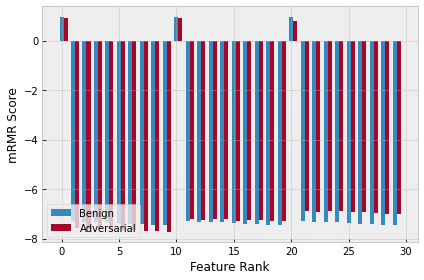

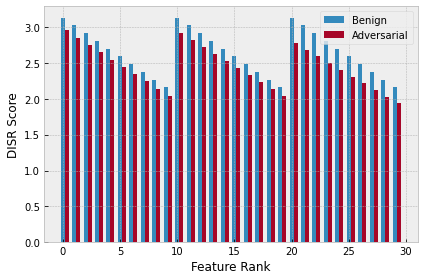

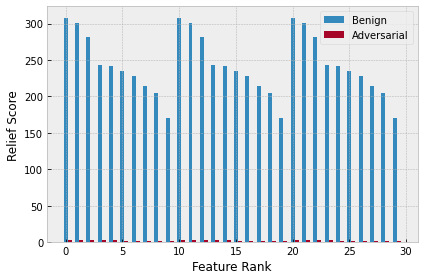

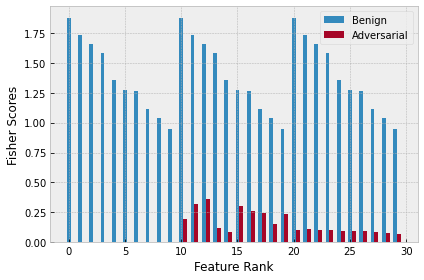

In [7]:
# To load adversarial data (having both benign and malicous samples), Xtr_pois, ytr_pois is used for CleanLabel
# and Embedding attacks, else it is Xadv, yadv
 
classifier = ['Classifier_LR', 'Classifier_MLP', 'Classifier_NN'] #, 'Classifier_SVC']
attack = 'deepfool' # deepfool, #fgsm, jsma, CleanLabel/Single, CleanLabel/Pattern, Embedding
post = 'deepfool'   # #deepfool, fgsm, jsma, cleanlabel_single, cleanlabel_pattern
RUNS = 5
SEED = 1
NBEST = 10
np.random.seed(SEED)
 

for j in range(len(data_sets)):
#for j in range(5):
    # We will use these following lists to collect scores for all classifiers on a single dataset
    mim_scores_norm_dataset = []
    mim_scores_adv_dataset = []
    mrmr_scores_norm_dataset = []
    mrmr_scores_adv_dataset = []
    disr_scores_norm_dataset = []
    disr_scores_adv_dataset = []
    relief_scores_norm_dataset = []
    relief_scores_adv_dataset = []
    fisher_scores_norm_dataset = []
    fisher_scores_adv_dataset = []
    n_groups = 0  # keeps track of number of groups for all the attack classifiers run on a single dataset
    for i in range(len(classifier)):
        d = np.load('outputs/' + classifier[i] + '/' + attack + '/' + 'adversarial_data_' + data_sets[j] + '_' + post + '.npz')
        Xtr, ytr, Xtr_pois, ytr_pois = d['Xtr'], d['ytr'], d['Xadv'], d['yadv']
       
        mim_scores_norm, mim_scores_adv = np.zeros((Xtr.shape[1],)), np.zeros((Xtr.shape[1],))
        mrmr_scores_norm, mrmr_scores_adv = np.zeros((Xtr.shape[1],)), np.zeros((Xtr.shape[1],))
        disr_scores_norm, disr_scores_adv = np.zeros((Xtr.shape[1],)), np.zeros((Xtr.shape[1],))
        relief_scores_norm, relief_scores_adv = np.zeros((Xtr.shape[1],)), np.zeros((Xtr.shape[1],))
        fisher_scores_norm, fisher_scores_adv = np.zeros((Xtr.shape[1],)), np.zeros((Xtr.shape[1],))
       
        for k in tqdm(range(RUNS)):           
            
            if ((attack == 'deepfool') or (attack == 'fgsm') or (attack == 'jsma')):
                Xa, ya = np.concatenate((Xtr, Xtr_pois)), np.concatenate((ytr, ytr_pois))
            else:
                Xa, ya = Xtr_pois, ytr_pois
            
            i_perm = np.random.permutation(len(Xtr))
            Xtr, ytr = Xtr[i_perm], ytr[i_perm]
           
            j_perm = np.random.permutation(len(Xa))
            Xa, ya = Xa[j_perm], ya[j_perm]
            
#             temp1 = list(zip(Xtr, ytr))
#             random.shuffle(temp1)
#             Xtr, ytr = zip(*temp1)
           
#             temp2 = list(zip(Xtr_pois, ytr_pois))
#             random.shuffle(temp2)
#             Xtr_pois, ytr_pois = zip(*temp2)
           
            # MIM -
            # Normal
            mi_score = mutual_info_classif(Xtr, ytr)
            mim_scores_norm += mi_score
            # Adversarial
            mi_score = mutual_info_classif(Xa, ya)
            mim_scores_adv += mi_score
       
            # mRMR -
            # Normal
            _, mi_score, _ = mrmr(Xtr, ytr, n_selected_features=Xtr.shape[1])
            mrmr_scores_norm += mi_score
            # Adversarial
            _, mi_score, _ = mrmr(Xa, ya, n_selected_features=Xtr.shape[1])
            mrmr_scores_adv += mi_score
 
            # DISR -
            # Normal
            _, mi_score, _ = disr(Xtr, ytr, n_selected_features=Xtr.shape[1])
            disr_scores_norm += mi_score
            # Adversarial
            _, mi_score, _ = disr(Xa, ya, n_selected_features=Xtr.shape[1])
            disr_scores_adv += mi_score
           
            # Relief -
            # Normal
            r_scores = reliefF(Xtr, ytr)
            relief_scores_norm += r_scores
            # Adversarial
            r_scores = reliefF(Xa, ya)
            relief_scores_adv += r_scores
           
            # Fisher -
            # Normal
            f_scores = fisher_score(Xtr, ytr)
            #print("Clean Fisher Score: ", f_scores, "for RUN: ", k+1)
            fisher_scores_norm += f_scores
            # Adversarial
            f_scores = fisher_score(Xa, ya)
            #print("Adv Fisher Score: ", f_scores, "for RUN: ", k+1)
            fisher_scores_adv += f_scores
           
 
 
   
        # clean up MIM scores
        mim_scores_norm /= RUNS
        mim_scores_adv /= RUNS
        i_sorted = np.argsort(mim_scores_norm)[::-1]
        adv_sorted = np.argsort(mim_scores_adv)[::-1]
       
        i_sorted = i_sorted[:NBEST]
        adv_sorted = adv_sorted[:NBEST]
        print("MIM: top 10 features from normal data", i_sorted, "for ", data_sets[j], ": ")
        print("MIM: top 10 features from adversarial data", adv_sorted, "for ", data_sets[j], ": ")
        
        mim_scores_adv = mim_scores_adv[i_sorted]
        mim_scores_adv_dataset += mim_scores_adv.tolist()
        mim_scores_norm = mim_scores_norm[i_sorted]
        mim_scores_norm_dataset += mim_scores_norm.tolist() # works like an append
 
        # clean up mRMR scores
        mrmr_scores_norm /= RUNS
        mrmr_scores_adv /= RUNS
        i_sorted = np.argsort(mrmr_scores_norm)[::-1]
        adv_sorted = np.argsort(mrmr_scores_adv)[::-1]
       
        i_sorted = i_sorted[:NBEST]
        adv_sorted = adv_sorted[:NBEST]
        print("MRMR: top 10 features from normal data", i_sorted, "for ", data_sets[j], ": ")
        print("MRMR: top 10 features from adversarial data", adv_sorted, "for ", data_sets[j], ": ")
        mrmr_scores_adv = mrmr_scores_adv[i_sorted]
        mrmr_scores_adv_dataset += mrmr_scores_adv.tolist()
        mrmr_scores_norm = mrmr_scores_norm[i_sorted]
        mrmr_scores_norm_dataset += mrmr_scores_norm.tolist()
 
        # clean up DISR scores
        disr_scores_norm /= RUNS
        disr_scores_adv /= RUNS
        i_sorted = np.argsort(disr_scores_norm)[::-1]
        adv_sorted = np.argsort(disr_scores_adv)[::-1]
        
        i_sorted = i_sorted[:NBEST]
        adv_sorted = adv_sorted[:NBEST]
        print("DISR: top 10 features from normal data", i_sorted, "for ", data_sets[j], ": ")
        print("DISR: top 10 features from adversarial data", adv_sorted, "for ", data_sets[j], ": ")
        disr_scores_adv = disr_scores_adv[i_sorted]
        disr_scores_adv_dataset+= disr_scores_adv.tolist()
        disr_scores_norm = disr_scores_norm[i_sorted]
        disr_scores_norm_dataset += disr_scores_norm.tolist()
       
        # clean up Relief scores
        relief_scores_norm /= RUNS
        relief_scores_adv /= RUNS
        i_sorted = np.argsort(relief_scores_norm)[::-1]
        adv_sorted = np.argsort(relief_scores_adv)[::-1]
       
        i_sorted = i_sorted[:NBEST]
        adv_sorted = adv_sorted[:NBEST]
        print("Relief: top 10 features from normal data", i_sorted, "for ", data_sets[j], ": ")
        print("Relief: top 10 features from adversarial data", adv_sorted, "for ", data_sets[j], ": ")
        relief_scores_adv = relief_scores_adv[i_sorted]
        relief_scores_adv_dataset += disr_scores_adv.tolist()
        relief_scores_norm = relief_scores_norm[i_sorted]
        relief_scores_norm_dataset += relief_scores_norm.tolist()
       
        # clean up Fisher scores
        fisher_scores_norm /= RUNS
        fisher_scores_adv /= RUNS
        i_sorted = np.argsort(fisher_scores_norm)[::-1]
        adv_sorted = np.argsort(fisher_scores_adv)[::-1]
       
        i_sorted = i_sorted[:NBEST]
        adv_sorted = adv_sorted[:NBEST]
        print("Fisher: top 10 features from normal data", i_sorted, "for ", data_sets[j], ": ")
        print("Fisher: top 10 features from adversarial data", adv_sorted, "for ", data_sets[j], ": ")
        fisher_scores_adv = fisher_scores_adv[i_sorted]
        fisher_scores_adv_dataset += fisher_scores_adv.tolist()
        fisher_scores_norm = fisher_scores_norm[i_sorted]
        fisher_scores_norm_dataset += fisher_scores_norm.tolist()
   
    
        #x = [i for i in range(len(i_sorted))]
        n_groups = n_groups + len(i_sorted)
 
    # ------------------------------------------------------------------------------------------------
    # create plot: mim scores
    #n_groups = len(i_sorted) #n_groups = len(x)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1.
 
    # rects1 = plt.bar(index, mim_scores_norm, bar_width, alpha=opacity, label='Benign')
    # rects2 = plt.bar(index+bar_width, mim_scores_adv, bar_width, alpha=opacity, label='Adversarial')
    rects1 = plt.bar(index, mim_scores_norm_dataset, bar_width, alpha=opacity, label='Benign')
    rects2 = plt.bar(index+bar_width, mim_scores_adv_dataset, bar_width, alpha=opacity, label='Adversarial')
    plt.xlabel('Feature Rank')
    plt.ylabel('MIM Score')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(''.join(['outputs/', classifier[i], '/', attack, '/barcharts/', 'MIM/barcharts_', data_sets[j], '_', post, '.pdf']))
    #plt.savefig(''.join(['outputs/', classifier[i], '/barcharts/', 'MIM/barcharts_', data_sets[j], '_', post, '.pdf']))
    #plt.close()
   
    
    # ------------------------------------------------------------------------------------------------
    # create plot: mrmr scores
    #n_groups = len(x)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1.
 
    # rects1 = plt.bar(index, mrmr_scores_norm, bar_width, alpha=opacity, label='Benign')
    # rects2 = plt.bar(index+bar_width, mrmr_scores_adv, bar_width, alpha=opacity, label='Adversarial')
    rects1 = plt.bar(index, mrmr_scores_norm_dataset, bar_width, alpha=opacity, label='Benign')
    rects2 = plt.bar(index+bar_width, mrmr_scores_adv_dataset, bar_width, alpha=opacity, label='Adversarial')
    plt.xlabel('Feature Rank')
    plt.ylabel('mRMR Score')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(''.join(['outputs/', classifier[i], '/', attack, '/barcharts/', 'MRMR/barcharts_', data_sets[j], '_', post, '.pdf']))
    #plt.savefig(''.join(['outputs/', classifier[i], '/barcharts/', 'MRMR/barcharts_', data_sets[j], '_', post, '.pdf']))
    #plt.close()
       
    # create plot: disr scores
    #n_groups = len(x)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1.
 
    # rects1 = plt.bar(index, disr_scores_norm, bar_width, alpha=opacity, label='Benign')
    # rects2 = plt.bar(index+bar_width, disr_scores_adv, bar_width, alpha=opacity, label='Adversarial')
    rects1 = plt.bar(index, disr_scores_norm_dataset, bar_width, alpha=opacity, label='Benign')
    rects2 = plt.bar(index+bar_width, disr_scores_adv_dataset, bar_width, alpha=opacity, label='Adversarial')
    plt.xlabel('Feature Rank')
    plt.ylabel('DISR Score')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(''.join(['outputs/', classifier[i], '/', attack, '/barcharts/', 'DISR/barcharts_', data_sets[j], '_', post, '.pdf']))
    #plt.savefig(''.join(['outputs/', classifier[i], '/barcharts/', 'DISR/barcharts_', data_sets[j], '_', post, '.pdf']))
    #plt.close()
       
    # create plot: relief scores
    #n_groups = len(x)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1.
 
    # rects1 = plt.bar(index, relief_scores_norm, bar_width, alpha=opacity, label='Benign')
    # rects2 = plt.bar(index+bar_width, relief_scores_adv, bar_width, alpha=opacity, label='Adversarial')
    rects1 = plt.bar(index, relief_scores_norm_dataset, bar_width, alpha=opacity, label='Benign')
    rects2 = plt.bar(index+bar_width, relief_scores_adv_dataset, bar_width, alpha=opacity, label='Adversarial')
    plt.xlabel('Feature Rank')
    plt.ylabel('Relief Score')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(''.join(['outputs/', classifier[i], '/', attack, '/barcharts/', 'Relief/barcharts_', data_sets[j], '_', post, '.pdf']))
    #plt.savefig(''.join(['outputs/', classifier[i], '/barcharts/', 'Relief/barcharts_', data_sets[j], '_', post, '.pdf']))
    #plt.close()
       
    # create plot: fisher scores
    #n_groups = len(x)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1.
 
    # rects1 = plt.bar(index, fisher_scores_norm, bar_width, alpha=opacity, label='Benign')
    # rects2 = plt.bar(index+bar_width, fisher_scores_adv, bar_width, alpha=opacity, label='Adversarial')
    rects1 = plt.bar(index, fisher_scores_norm_dataset, bar_width, alpha=opacity, label='Benign')
    rects2 = plt.bar(index+bar_width, fisher_scores_adv_dataset, bar_width, alpha=opacity, label='Adversarial')
    plt.xlabel('Feature Rank')
    plt.ylabel('Fisher Scores')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(''.join(['outputs/', classifier[i], '/', attack, '/barcharts/', 'Fisher/barcharts_', data_sets[j], '_', post, '.pdf']))
    #plt.savefig(''.join(['outputs/', classifier[i], '/barcharts/', 'Fisher/barcharts_', data_sets[j], '_', post, '.pdf']))
    #plt.close()


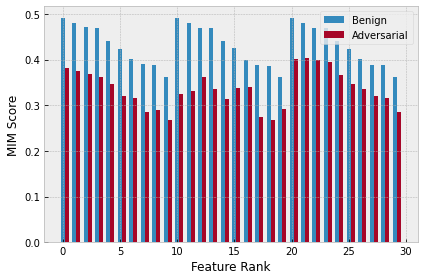

In [9]:
# rects1 = plt.bar(index, mim_scores_norm, bar_width, alpha=opacity, label='Benign')
# rects2 = plt.bar(index+bar_width, mim_scores_adv, bar_width, alpha=opacity, label='Adversarial')
rects1 = plt.bar(index, mim_scores_norm_dataset, bar_width, alpha=opacity, label='Benign')
rects2 = plt.bar(index+bar_width, mim_scores_adv_dataset, bar_width, alpha=opacity, label='Adversarial')
plt.xlabel('Feature Rank')
plt.ylabel('MIM Score')
plt.legend()
plt.tight_layout()
#plt.savefig(''.join(['outputs/', classifier[i], '/', attack, '/barcharts/', 'MIM/barcharts_', data_sets[j], '_', post, '.pdf']))
#plt.savefig(''.join(['outputs/', classifier[i], '/barcharts/', 'MIM/barcharts_', data_sets[j], '_', post, '.pdf']))
#plt.close()

In [32]:
a = [1,2,3]
b = []
b += a
b += a
b

[1, 2, 3, 1, 2, 3]

In [8]:
classifier = ['Classifier_LR'] #, 'Classifier_MLP', 'Classifier_NN'] #, 'Classifier_SVC']
attack = 'CleanLabel/Single' # deepfool, #fgsm, jsma, CleanLabel/Single, CleanLabel/Pattern, Embedding
post = 'cleanlabel_single'
for j in range(len(data_sets)): 

    np.random.seed(1)
    for i in range(len(classifier)):
        d = np.load('outputs/' + classifier[i] + '/' + attack + '/' + 'adversarial_data_' + data_sets[j] + '_' + post + '.npz')
        Xtr, ytr, Xtr_pois, ytr_pois = d['Xtr'], d['ytr'], d['Xtr_pois'], d['ytr_pois']
        print(d)